Ваша задача этом соревновании - предсказать цены на квартиры в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и цены на квартиры) и test.csv (только признаки).

Invite link for this competition: https://www.kaggle.com/t/b4c9382d4f934176af9fe860b1976528

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')

In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [ ]:
# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [ ]:
# Понижения размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [ ]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/report.png')
    plt.show()

In [ ]:
def evaluate_preds_last(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

ПУТИ К ДИРЕКТОРИЯМ ФАЙЛОВ

In [ ]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [ ]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [ ]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


Загрузка данных

Описание датасета

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

Номинативные переменные

In [ ]:
train_df.select_dtypes(include='object').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

# ЗАГРУЗКА ТЕСТОВОГО ДАТАСЕТА

In [ ]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [ ]:
#  Проверка совместимости датасетов
#train_df.shape[1] - 1 == test_df.shape[1]

In [ ]:
col = train_df.columns.values.tolist()
col

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [ ]:
#for i in col[1: 5]:
  #for j in col[4: 9]:
    #sns.lmplot(x=i, y=j, data=df)


# Создание функции предобработки данных

In [ ]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.modes=None
        self.list1 = list(range(1,400,5))
        self.list_Kitch=[]
        self.list_Kitch2=[]
        self.list_Floor=[]
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.modes = X.mode()
        
        for i in range(len(self.list1)-1):
            mdn=X.KitchenSquare[(X.Square >= self.list1[i-1]) & (X.Square <\
                self.list1[i]) & (X.KitchenSquare > 5) & (X.KitchenSquare <= 22)].median()
            self.list_Kitch.append(mdn)
            
        for i in range(len(self.list1)-1):
            mdn2=X['KitchenSquare'][(X.Square >= self.list1[i-1]) & (X.Square < self.list1[i]) &\
                                 (X.KitchenSquare > 5) & (X.KitchenSquare <= 22)].median()
            self.list_Kitch2.append(mdn2)
                   
        for j in range(50):
            list_r=[]
            for i in range(j, 50):
                mdn3=X['HouseFloor'][(X.Floor == i) & (X.HouseFloor > j) & (X.HouseFloor < 97)].median()
                list_r.append(mdn3)
            self.list_Floor.append(list_r)
            
  
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        X.loc[(X['Rooms'] == 2) & (X['Square'] < 32), 'Rooms'] = 1
        X.loc[(X['Rooms'] == 2) & (X['Square'] > 320), 'Rooms'] = 3
        X.loc[(X['Rooms'] == 3) & (X['Square'] < 43), 'Rooms'] = 2
        X.loc[(X['Rooms'] == 2) & (X['Square'] > 430), 'Rooms'] = 4
        X.loc[(X['Rooms'] == 3) & (X['Square'] < 61), 'Rooms'] = 3
        
        X.Rooms.fillna(self.medians['Rooms'], inplace=True) 
        
        #  Square
        
        X.loc[X['Square'] <= 10, 'Square'] = self.medians['Square']
        X=X[X['Square'] >= 10]
        
        X.Square.fillna(self.medians['Square'], inplace=True)  
        
        
        # KitchenSquare
        
        for i in range(len(self.list1)-1):
            X.loc[(X.Square >= self.list1[i-1]) & (X.Square < self.list1[i]) & (X.KitchenSquare > 0) &\
                  (X.KitchenSquare <= 5), 'KitchenSquare'] = self.list_Kitch[i]
                                                                                                                                                                                                                              
        X.loc[(X.KitchenSquare <= 5) & (X.KitchenSquare > 0), 'KitchenSquare'] = self.medians['KitchenSquare']
        
        for i in range(len(self.list1)-1):
            X.loc[(X.Square >= self.list1[i-1]) & (X.Square < self.list1[i]) & (X.KitchenSquare > 22),\
                  'KitchenSquare'] = self.list_Kitch2[i]                                                                                        
        
        if X.KitchenSquare[(X.KitchenSquare > 22)].count():
            X.loc[(X.KitchenSquare > 22), 'KitchenSquare'] = self.medians['KitchenSquare']                                                                                       
                                                                                                
        X.KitchenSquare.fillna(self.medians['KitchenSquare'], inplace=True)                                                                                          
                                                                                                  
        # LifeSquare
                                                                                                  
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1

        condition = (X['LifeSquare'].isna()) \
             & (~X['Square'].isna()) \
             & (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] \
                                            - X.loc[condition, 'KitchenSquare'] - 4                                
                                                   
        if X['LifeSquare'].isna().sum():
            X['LifeSquare']=X['LifeSquare'].fillna(self.medians['LifeSquare'])                                           
        
        X.loc[(X.LifeSquare < 10) & (X.Square < (X.KitchenSquare + 14))]
        
        X['LifeSquare10']=0
        X.loc[(X.LifeSquare < 10) & (X.Square < (X.KitchenSquare + 14)), \
             'LifeSquare10']=1
        
        X.loc[(X.LifeSquare < 10) & (X.Square < (X.KitchenSquare + 14)), \
            'LifeSquare'] = X.loc[(X.LifeSquare < 10) & (X.Square < (X.KitchenSquare + 14)), \
                'LifeSquare'] + X.loc[(X.LifeSquare < 10) & (X.Square < (X.KitchenSquare + 14)), \
                     'KitchenSquare']
        
        X.loc[(X.LifeSquare10 == 1), 'KitchenSquare'] = 0
        X.loc[(X.LifeSquare < 10), 'LifeSquare'] = X.loc[(X.LifeSquare < 10), \
            'Square'] - X.loc[(X.LifeSquare < 10), 'KitchenSquare'] - 4
        
        X.loc[(X.Square - X.KitchenSquare - X.LifeSquare > \
            33) & (X.Square < 90), 'LifeSquare'] = X.loc[(X.Square - \
                X.KitchenSquare - X.LifeSquare > 33) & (X.Square < 90),\
                    'Square'] - X.loc[(X.Square - X.KitchenSquare - X.LifeSquare \
                        > 33) & (X.Square < 90), 'KitchenSquare'] - 33
    
        X['LifeSquare_del_Square']=(X['LifeSquare']+X['KitchenSquare'] + \
                                   3)/X['Square']
    
        X.loc[(X.LifeSquare_del_Square>1), 'LifeSquare'] = X.loc[\
            (X.LifeSquare_del_Square>1), 'Square'] \
                - X.loc[(X.LifeSquare_del_Square>1), 'KitchenSquare'] - 4
        
        X['LifeSquare10'] = 0
        X.loc[(X.LifeSquare < 10), 'LifeSquare10'] = 1
        
        X.loc[(X.LifeSquare10 == 1), \
             'LifeSquare'] = X.loc[(X.LifeSquare10 == 1)]['LifeSquare'] + X.loc[(X.LifeSquare10 == 1)]['KitchenSquare']
        
        X.loc[(X.LifeSquare10 == 1), 'KitchenSquare'] = 0
        
        X.LifeSquare.fillna(self.medians['LifeSquare'], inplace=True)
        
        
        # HouseFloor, Floor
                                                   
        X.HouseFloor=X.HouseFloor.fillna(1)
        
        for j in range(50):
            for i in range(0, 50-j):
                X.loc[(X.Floor == i) & (X.HouseFloor == j) & (i > j),\
                      'HouseFloor'] = self.list_Floor[j][i]
                
        X.HouseFloor=X.HouseFloor.fillna(22)                                           
        X.loc[(X['Floor'] > X['HouseFloor']), \
             'Floor'] = X.loc[(X['Floor'] > X['HouseFloor'])]['HouseFloor']                                                                                     
        X.loc[X.HouseFloor > 96, 'HouseFloor'] = 96  
        
        X.HouseFloor.fillna(self.medians['HouseFloor'], inplace=True)
        
        # HouseYear
                                                                                                        
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020                                                                                     
        X.fillna(X['HouseYear'].fillna(self.modes['HouseYear']), inplace=True)                                           

        
        
        #Healthcare_1
       
        X['Healthcare_1_nan'] = 0                                           
        X.loc[X['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1                                           
        train_df_HC1=X[X.Healthcare_1_nan==0].reset_index(drop=True)    
        train_df_HC1=train_df_HC1.drop('Healthcare_1_nan', axis=1)
        Z=train_df_HC1[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',\
           'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', \
          'Social_3', 'Helthcare_2', 'Shops_1']]
        y=pd.DataFrame(train_df_HC1.Healthcare_1)                                           
        X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.25)                                          
        final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42,  
                                        n_estimators=400)

        final_model.fit(X_train, y_train)                                           
        
        y_train_preds = final_model.predict(X_train)                                          
        y_test_preds = final_model.predict(X_test)                                           
                                                   
        train_df_HC1_Nan=X[X.Healthcare_1_nan==1].reset_index(drop=True)
        train_df_HC1_Nan=train_df_HC1_Nan.drop(['Healthcare_1_nan', 'Healthcare_1'], axis=1)
        W=train_df_HC1_Nan[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',\
            'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', \
            'Social_3', 'Helthcare_2', 'Shops_1']]
        train_df_HC1_Nan_preds = final_model.predict(W)                                           
        pred=pd.DataFrame({'Healthcare_1': train_df_HC1_Nan_preds})                                          
        train_df_HC1_Nan.insert(15, 'Healthcare_1', pred)                                          
        train_df_prep=train_df_HC1_Nan.append(train_df_HC1, ignore_index=True)                                           
        X = train_df_prep  
        
        X=X.drop({'LifeSquare_nan', 'LifeSquare_del_Square', 'LifeSquare10'}, axis=1)
                                               
        X.fillna(self.medians, inplace=True)
        
        return X

# **Уменьшение объема памяти, который занимает датасет**

In [ ]:
train_df['Id'] = train_df['Id'].astype(str)
test_df['Id'] = test_df['Id'].astype(str)

In [ ]:
train_df.Rooms=train_df.Rooms.round()
test_df.Rooms=test_df.Rooms.round()

In [ ]:
train_df.Rooms=train_df.Rooms.astype('int64')
test_df.Rooms=test_df.Rooms.astype('int64')

In [ ]:
train_df.HouseFloor=train_df.HouseFloor.round()
test_df.HouseFloor=test_df.HouseFloor.round()

In [ ]:
train_df.HouseFloor=train_df.HouseFloor.astype('int64')
test_df.HouseFloor=test_df.HouseFloor.astype('int64')

# Функция понижения размерности признаков датафрейма

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2 # подсчитываем память потребляемую изначальным датасетом
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns: # проходимся по всем колонкам
        col_type = df[col].dtype  # узнаем тип колонки
        
        if col_type != object:
            c_min = df[col].min() # смотрим минимальное значение признака
            c_max = df[col].max() # смотрим максимальное значение признака
            if str(col_type)[:3] == 'int':  # if int
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: # сравниваем с int8
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max: # сравниваем с int16 и.т.д.
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else: # если был тип object, то меняем его тип на пандасовский тип 'category', на нем разные агрегации данных работают в разы быстрее
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # считаем сколько теперь у нас занято памяти
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))  # и выводим статистику
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Генерация новых признаков

In [ ]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 1, 'B': 0}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X.fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X.fillna(self.med_price_by_floor_year_median, inplace=True)
            
        #is_new(self, X):
        
        X['Is_new'] = 0
        X.loc[(X['HouseYear'] > 2018), 'Is_new'] = 1
        
        #is_last_floor(self, X):
        
        X['Is_last_floor'] = 0
        X.loc[(X['Floor'] == X['HouseFloor']), 'Is_last_floor'] = 1
        
        #is_first_floor(self, X):
        
        X['Is_first_floor'] = 0
        X.loc[(X['Floor'] == 1), 'Is_first_floor'] = 1
        
        #is_kitchen(self, X):
        
        X['Is_Kitchen'] = 1
        X.loc[(X['KitchenSquare'] == 0), 'Is_Kitchen'] = 0
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X
    

# Отбор признаков 

In [ ]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'floor_cat', 'year_cat', 'DistrictSize',
                     'new_district', 'IsDistrictLarge',  'MedPriceByDistrict', 'MedPriceByFloorYear', 'Is_new',
                     'Is_last_floor', 'Is_first_floor', 'Is_Kitchen', ]

target_name = 'Price'

# Разбиение на train и test 

In [ ]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

#train_df['DistrictId'] = train_df['DistrictId'].astype(str)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [ ]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 20), (3300, 20), (5000, 20))

In [ ]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 31), (3300, 31), (5000, 31))

In [ ]:
X_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Rooms_outlier',
 'DistrictSize',
 'new_district',
 'IsDistrictLarge',
 'floor_cat',
 'year_cat',
 'MedPriceByDistrict',
 'MedPriceByFloorYear',
 'Is_new',
 'Is_last_floor',
 'Is_first_floor',
 'Is_Kitchen']

In [ ]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [ ]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

# ПОНИЖЕНИЕ РАЗМЕРНОСТИ

In [ ]:
X_train = reduce_mem_usage(X_train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.45 MB
Decreased by 70.4%


In [ ]:
X_valid = reduce_mem_usage(X_valid)

Memory usage of dataframe is 0.76 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.4%


In [ ]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 1.14 MB
Memory usage after optimization is: 0.36 MB
Decreased by 68.3%


# СТАНДАРТИЗАЦИЯ

Для дальнейшей обработки данных нужно данные стандартизировать.

In [ ]:
scaler = RobustScaler()

colnames = X_train.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
test_df_scaled = pd.DataFrame(scaler.transform(test_df), columns=colnames)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=colnames)

# Построение корреляционной матрицы

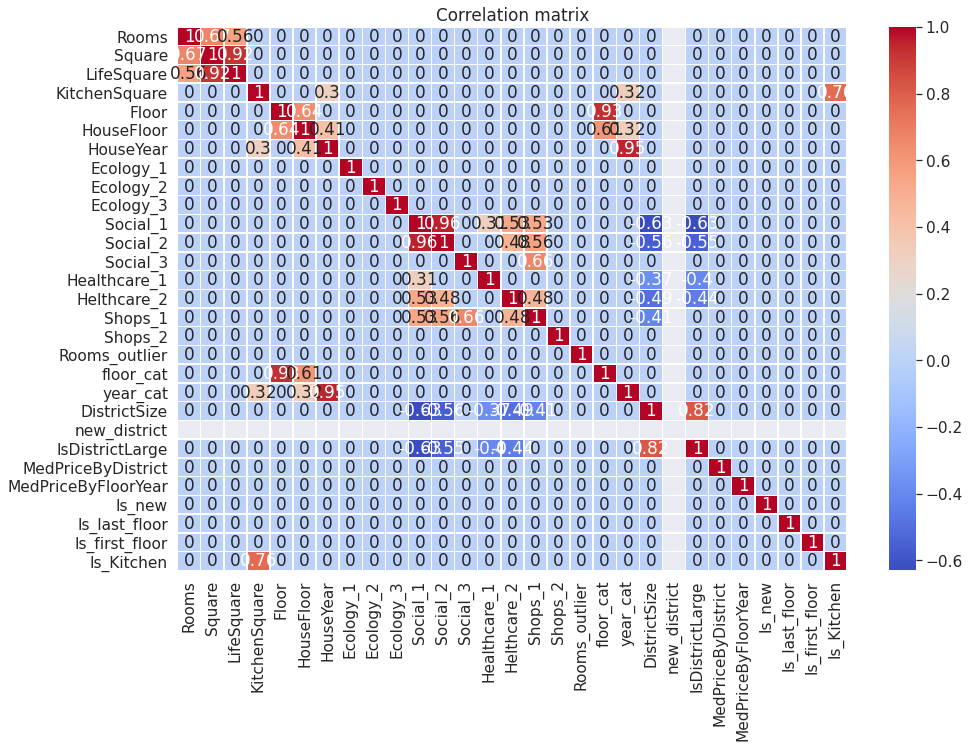

In [ ]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X_train_scaled.corr()
corr_matrix = np.round(corr_matrix, 2)  # округлим до 2 знаков
corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # если корреляция меньше 0,3, то мы заменим на 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**ОБРАБОТКА ЛИНЕЙНО КОРРЕЛИРУЮЩИХСЯ ФИЧЕЙ МЕТОДОМ РСА**

Колонки Social_1 и Social_2, Square и LifeSquare имеют корреляцию 0,9.
Это плохо для модели. Надо их объеденить.

Объединение Social_1 и Social_2

In [ ]:
class РСА_features():
    """Генерация новых фич взамен коррелирующих более чем на 0,8"""

    def __init__(self):
        self.pca = PCA(n_components=1, random_state=42)

    
    
    def fit_transform(self, X):
        
                # Объединение Social_1 и Social_2
        df_small = X[['Social_1', 'Social_2']]
        df_small['component_1'] = self.pca.fit_transform(df_small)
        #X.insert(10,'Social_1_Social_2', df_small.component_1)
        
    
        # Объединение Square и LifeSquare
        df_small = X[['Square', 'LifeSquare']]
        df_small['component_1'] = self.pca.fit_transform(df_small)
        #X.insert(1, 'Square_LifeSquare', df_small.component_1)
    
    
    def transform(self, X):
        
        # Объединение Social_1 и Social_2
        df_small = X[['Social_1', 'Social_2']]
        df_small['component_1'] = self.pca.transform(df_small)
        X.insert(10,'Social_1_Social_2', df_small.component_1)
        
    
        # Объединение Square и LifeSquare
        df_small = X[['Square', 'LifeSquare']]
        df_small['component_1'] = self.pca.transform(df_small)
        X.insert(1, 'Square_LifeSquare', df_small.component_1)
        
  
        return X
    
   

In [ ]:
pcafeatures = РСА_features()
pcafeatures.fit_transform(X_train_scaled)

X_train_scaled_mc = pcafeatures.transform(X_train_scaled)
X_valid_scaled_mc = pcafeatures.transform(X_valid_scaled)
test_df_scaled_mc = pcafeatures.transform(test_df_scaled)

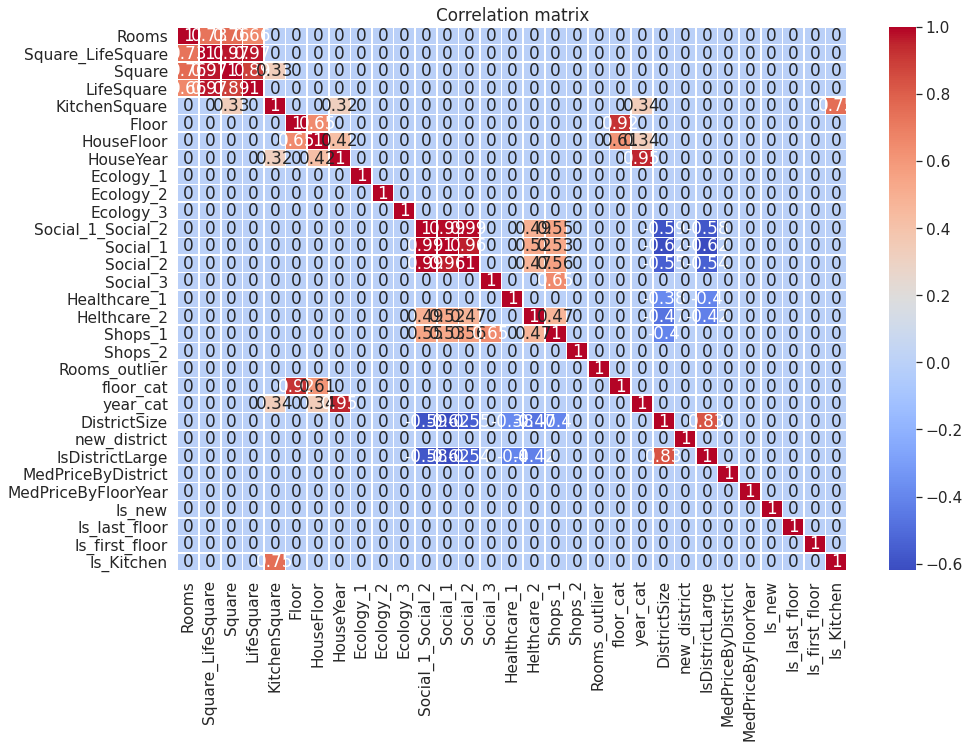

In [ ]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = test_df_scaled_mc.corr()
corr_matrix = np.round(corr_matrix, 2)  # округлим до 2 знаков
corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # если корреляция меньше 0,3, то мы заменим на 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

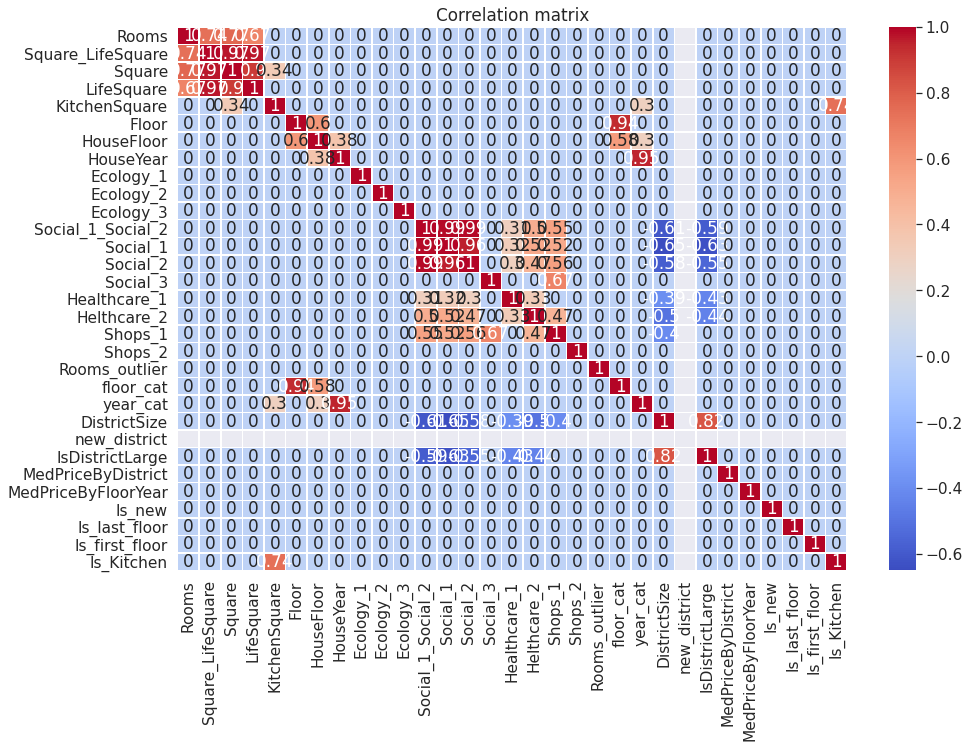

In [ ]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X_valid_scaled_mc.corr()
corr_matrix = np.round(corr_matrix, 2)  # округлим до 2 знаков
corr_matrix[np.abs(corr_matrix) < 0.3] = 0  # если корреляция меньше 0,3, то мы заменим на 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Корреляционные матрицы по X_valid_scaled_mc и test_df_scaled_mc достаточно похожи.

Выделяю датасеты без дополнительных фич для анализа

In [ ]:
X_train_sample=X_train_scaled_mc[['Rooms', 'Square_LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1_Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']]

In [ ]:
X_valid_sample=X_valid_scaled_mc[['Rooms', 'Square_LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1_Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']]

In [ ]:
test_df_sample=test_df_scaled_mc[['Rooms', 'Square_LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1_Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']]

# Ищу количество кластеров


In [ ]:
# Функция понижения размерности
def reduce_dims(df, dims=2, method='pca', perplexity=30):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

In [ ]:
# Функции визуализации
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

In [ ]:
def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=components_with_labels_df.iloc[:, -1], 
                   cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [ ]:
dim_reducer2d_tsne, components_2d_tsne = reduce_dims(X_train_sample, dims=2, method='tsne', perplexity=50)
components_2d_tsne.head(2)

,component_1,component_2
0,-65.065941,-14.757332
1,-18.758190,-28.086670


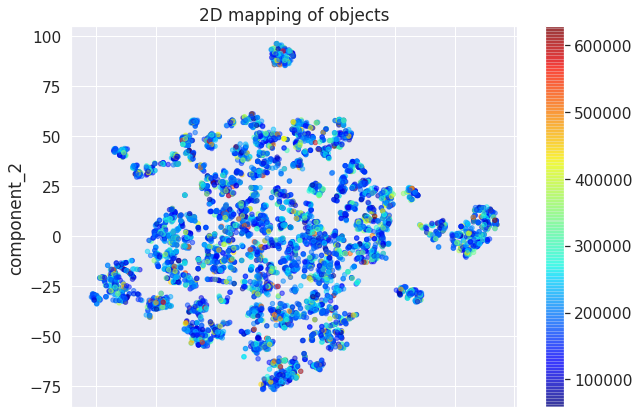

In [ ]:
display_components_in_2D_space(components_2d_tsne, y)

In [ ]:
dim_reducer3d_tsne, components_3d_tsne = reduce_dims(X_train_sample, dims=3, method='tsne', perplexity=50)
components_3d_tsne.head(2)

,component_1,component_2,component_3
0,-0.968624,23.079754,3.868367
1,-0.050928,8.994232,10.199821


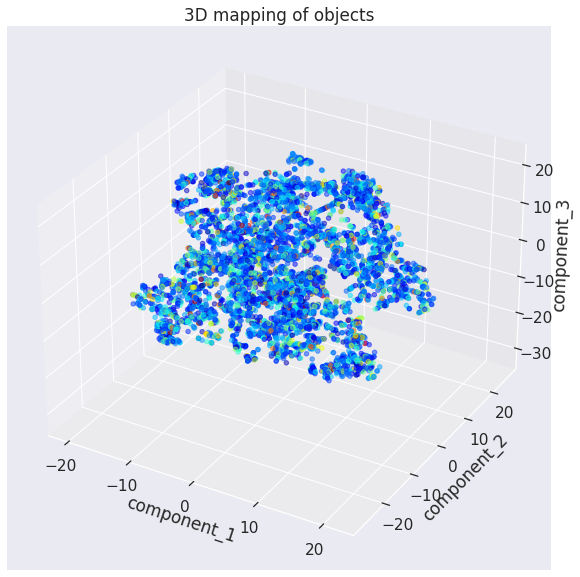

In [ ]:
display_components_in_3D_space(components_3d_tsne, y)

Метод tsne не дал результата. Пробую РСА.

In [ ]:
dim_reducer2d, components_2d = reduce_dims(X_train_sample, dims=2, method='pca')
components_2d.head(2)

,component_1,component_2
0,-1.096520,-0.225809
1,-1.042972,0.071145


Для тестовых данных

In [ ]:
dims = 2
components = dim_reducer2d.transform(X_valid_sample)
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_2d_test = pd.DataFrame(data = components, columns = colnames)
components_2d_test.head()

,component_1,component_2
0,-1.584000,-0.531724
1,-1.187726,-0.675263
2,-1.581938,1.038670
3,-1.521345,0.631876
4,-0.782910,-0.616092


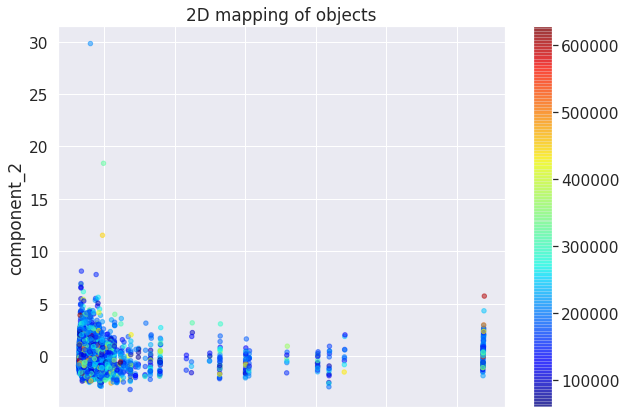

In [ ]:
display_components_in_2D_space(components_2d, y_train)

In [ ]:
dim_reducer3d, components_3d = reduce_dims(X_train_sample, dims=3, method='pca')

In [ ]:
dims = 3
components = dim_reducer3d.transform(X_valid_sample)
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_3d_test = pd.DataFrame(data = components, columns = colnames)
components_3d_test.head()

,component_1,component_2,component_3
0,-1.584000,-0.531723,-2.285337
1,-1.187727,-0.675263,-0.101111
2,-1.581937,1.038671,1.062003
3,-1.521344,0.631877,-0.175421
4,-0.782910,-0.616092,1.352960


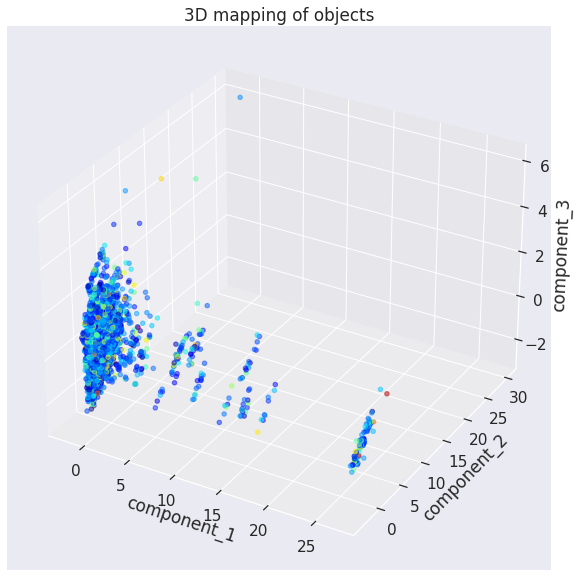

In [ ]:
display_components_in_3D_space(components_3d, y_train)

Опять неудача. Разбить на кластеры, конечно, можно. Но навряд ли это получится качественно. Так чтобы это дало значительную прибавку точности модели. Усложнение модели может при таком качестве дать обратный эффект.

Обучение

In [ ]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train_sample, y_train)

RandomForestRegressor(random_state=21)

In [ ]:
y_train_preds = rf_model.predict(X_train_sample)
y_test_preds = rf_model.predict(X_valid_sample)

Train R2:	0.844
Test R2:	-0.098


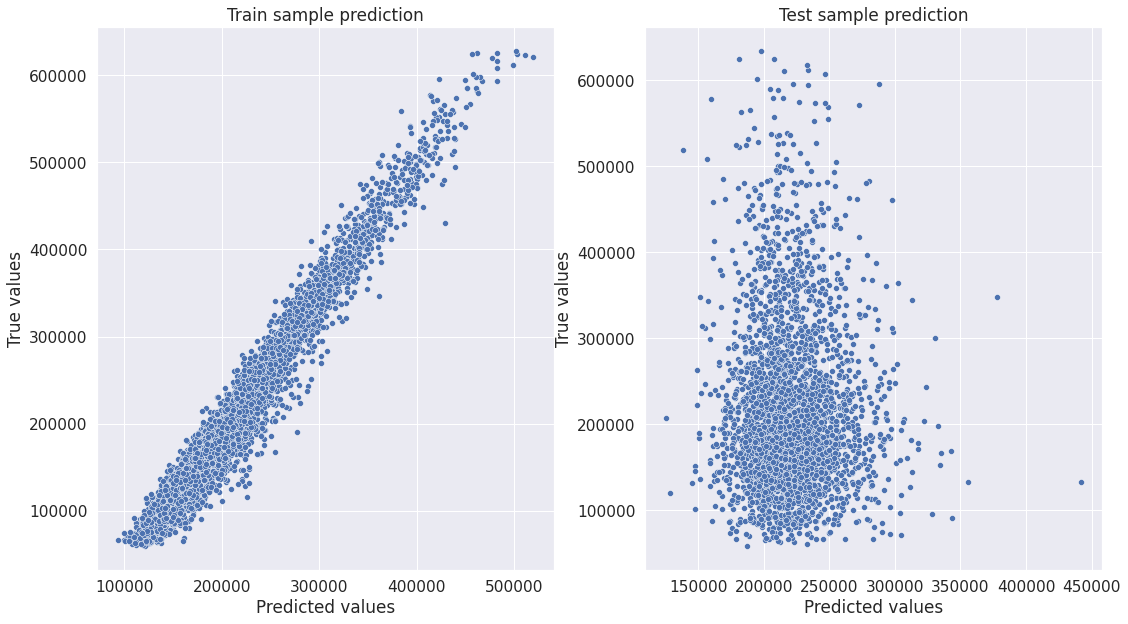

In [ ]:
evaluate_preds_last(y_train, y_train_preds, y_valid, y_test_preds)